# Understanding and Predicting Employee Turnover

## HR Analytics
***

## Table of Contents
### The Problem
- [Why is Employee Turnover a Problem?](#problem)

### Data Quality Check
- [Simple Inspection of Data](#datacleaning)

### Descriptive Statistics
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)
- [Correlation Matrix](#correlation_matrix)

### Exploratory Data Analysis
- [Employee Satisfaction, Evaluation, and Project Count Distribution](#eda1)
- [Employee Satisfaction Distribution](#eda2)
- [Employee Years At Company Distribution](#eda3)
- [Employee Department Distribution](#department)
- [Employee Monthly Income Distribution](#income)
- [Employee Job Level Distribution](#joblevel)
- [Employee Pair Plot Distribution](#pairplot)


### Simple Pre-Processing
- [Pre-Processing: Categorical and Numerical Variable](#pre_processing)

### Class Imbalance
- [How to Treat Class Imbalance Problems](#class_imbalance)

### Split Train/Test Set
- [Splitting the Data into Train/Test Sets](#train_test_split)

### Resample Techniques to Treat Imbalance Data
- [Evaluate Original, Upsampled, and Downsampled Data Metrics](#resample)
- [Choose Which Sampling Technique to Use For Model - Upsampling](#upsampling)

### Train/Test Model Perfomance with 5-Fold CV
- [Logistic Regression Classifier](#lr)
- [Random Forest Classifier](#rf)
- [Gradient Boosting](#svc)

### Evaluation Metric (F1 Score & ROC/AUC)
- [ROC and AUC](#roc)
- [Feature Importance](#feature_importance)






***
### Objective: 
- To understand what factors contributed most to employee turnover.

- To create a model that predicts the likelihood if a certain employee will leave the company or not. 

- To create or improve different retention strategies on targeted employees. 

The implementation of this model will allow management to create better decision-making actions.

### We'll be covering:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?


<a id='problem'></a>
### The Problem:

One of the most common problems at work is **turnover.** 

Replacing a worker earning about **50,000 dollars** cost the company about **10,000 dollars** or 20% of that worker’s yearly income according to the Center of American Progress.

Replacing a high-level employee can cost multiple of that...

**Cost include:**
- Cost of off-boarding 
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

**Annual Cost of Turnover** = (Hiring + Onboarding + Development + Unfilled Time) * (# Employees x Annual Turnover Percentage)

**Annual Cost of Turnover** = (1,000 + 500) x (15,000 * 24%)

**Annual Cost of Turnover)** = 1500 x 3600

**Annual Cost of Turnover)** = 5400000


## Example

1. Jobs (earning under 30k a year): the cost to replace a 10/hour retail employee would be **3,328 dollars**.
2. Jobs (earning 30k-50k a year) - the cost to replace a 40k manager would be **8,000 dollars**.
3. Jobs of executives (earning 100k+ a year) - the cost to replace a 100k CEO is **213,000 dollars**.

# Data Set Description

1. Attrition/turnover : Whether employees are still with the company or whether they’ve gone to work somewhere else.
2. Age: 18 to 60 years old
3. Gender: Female or Male
4. Department: Research & Development, Sales, Human Resources.
5. BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel.
6. DistanceFromHome: Distance between the company and their home in miles.
7. MonthlyIncome: Employees' numeric monthly income.
8. MaritalStatus: Married, Single, Divorced.
9. Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.
10. EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other.
11. EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
12. RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
13. JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
14. JobRole: Sales Executive，Research Science, Laboratory Tec, Manufacturing, Healthcare Rep, etc
15. JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
16. OverTime: Whether they work overtime or not.
17. NumCompaniesWorked: Number of companies they worked for before joinging IBM.
18. PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'.
19. YearsAtCompany: Years they worked for IBM.
20. WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.
21. YearsSinceLastPromotion: Years passed since their last promotion.

# Import Packages
***

In [2]:
__author__ = "Chhavi Arora"
__email__ = "chhavigarora@gmail.com"

In [40]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)


#### Define the relevant functions needed throughout the span of the project. 

In [7]:
#function to load the data into a Pandas Dataframe
def load_f(file):
    return pd.read_csv(file)

#clean the data - remove duplicates and salaries that are $0
def clean_d(original_df):
    clean_d = original_df.drop_duplicates(subset='jobId')
    clean_d = original_df[original_df.salary>0]
    return clean_d
    
#scatter plots 
def scatter_data(df, col):
    plt.figure(figsize = (12,8))
    plt.scatter(df[col], df['attrition'] )
    plt.ylabel('attrition')
    plt.xlabel(col)

#regression plots
def reg_data(df, col):
    plt.figure(figsize=(12,8))
    sns.regplot(x=df[col], y = df['attrition'], data = df, line_kws = {'color' : 'red'})    
    plt.ylim(0,)
    
#residual plots 
def res_data(df,col):
    plt.figure(figsize=(12,8))
    sns.residplot(x=df[col], y = df['attrition'], data = df)
    plt.show()

#distribution plots 
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
    ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
    plt.title(title)
    plt.show()
    plt.close()

# Read the Data
***

In [18]:
#load data
print("Loading data..")
train_df = load_f('IBM_HR.csv')

Loading data..


In [19]:
# Examine the dataset
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


As evinced from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, we shall handle their numerical encoding in the later stages. This section will be devoted to data exploration and as a first step, let us quickly carry our some simple data quality checks to see if there are any missing values in the dataset.

<a id='datacleaning'></a>
# Data Quality Check
***

In [11]:
# Can you check to see if there are any missing values in our data set
train_df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**The data is fairly clean.**

In [150]:
#check for duplicate values 
train_df[train_df.duplicated(keep='first')].shape

(0, 35)

**From the above we can see that there are no duplicate values.**

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [14]:
# Check the type of our features. Are there any data inconsistencies?
train_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**All data types are correct.**

In [151]:
df = train_df.copy()

In [154]:
#check for column values and remove the columns which have only one data level.
tem = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        tem.append(col)
        df.drop(col, inplace = True, axis = 1)


In [156]:
#check the shape of the data -
df.shape

(1470, 32)

In [157]:
tem

['EmployeeCount', 'Over18', 'StandardHours']

**EmployeeCount, Over18 and StandardHours columns are deleted.**

**We can also see that employee number doesn't have much meaning for the analysis and hence we will remove it.**

In [159]:
#drop EmployeeNumber
df.drop('EmployeeNumber', inplace = True, axis = 1)

In [160]:
#check shape
df.shape


(1470, 31)

In [167]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover_num
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


<a id='descriptive_statistics'></a>
# Exploratory Data Analysis
***

In [ ]:
#rename attrition to turnover
df.rename(columns={'Attrition':'turnover'})

In [27]:
# Calculate the turnover rate of our company's dataset.
turnover_rate = df.turnover.value_counts() / 1470
turnover_rate

No     0.838776
Yes    0.161224
Name: turnover, dtype: float64

#### In the train dataset, we have 237 (~ 16%) employees that left  and 1233 (~ 84%) employees that didn't. So it is clearly an imbalanced classification problem.

In [28]:
# Display the statistical overview of the employees
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [168]:
#display few details into the employees that left
df[df['turnover'] == 'Yes'].head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover_num
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,...,2,0,6,4,3,4,2,0,3,1
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,...,2,0,10,4,3,5,3,0,3,1
24,34,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,...,3,0,8,2,3,4,2,1,3,1


In [169]:
#display few details into the employees that didn't leave
df[train_df['turnover_num'] == 0].head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover_num
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,...,3,0,8,2,2,7,7,3,6,0
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,...,1,3,12,3,2,1,0,0,0,0


In [22]:
#define a target map - 
target_map = {'Yes' : 1, 'No': 0}

#create a numerical column for turnover to understand the correlation between the features
df['turnover_num'] = df['turnover'].apply(lambda x: target_map[x])

<a id='correlation_matrix'></a>
### Correlation Matrix

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

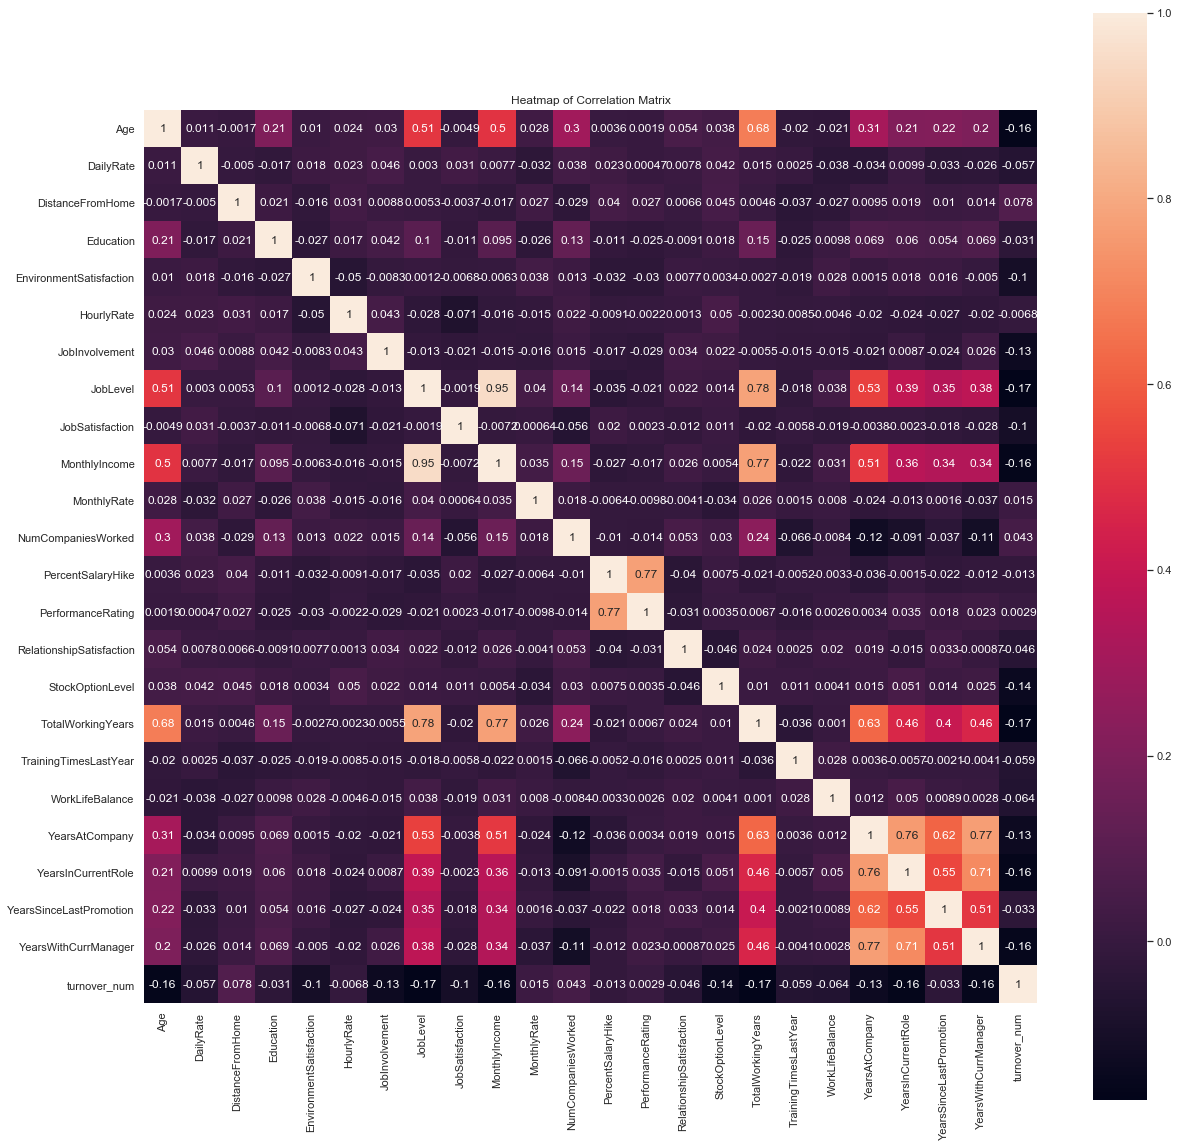

In [171]:
# Create a correlation matrix. What features correlate the most with turnover? 
corr = df.corr()
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square = True, ax = ax, annot = True)
plt.title('Heatmap of Correlation Matrix')


**From the correlation map we see that MonthlyIncome is highly correlated with JobLevel. However, DailyRate, HourlyRate & MonthlyRate are barely correlated with anything. Hence, we will remove those and only use MonthlyIncome going forward with out analysis.**

In [172]:
#remove columns - 
df.drop(['DailyRate', 'MonthlyRate', 'HourlyRate'], axis = 1, inplace = True)

**Some other insights from the heatmap -**<br/>

**1. Job level and total working years are highly correlated.**<br/>
**2. Monthly Income and total working years are highly correlated.**<br/>
**3. Performance rating and percentage salary hike are highly correlated.**<br/>
**4. Years in current role and years at company are highly correlated.**<br/>
**5. Years with current manager and years at company are highly correlated.**<br/>


<a id='eda1'></a>
# EDA 1. 
## Distribution of Satisfaction, Rating, and Worklife balance

Text(0, 0.5, 'Employee Count')

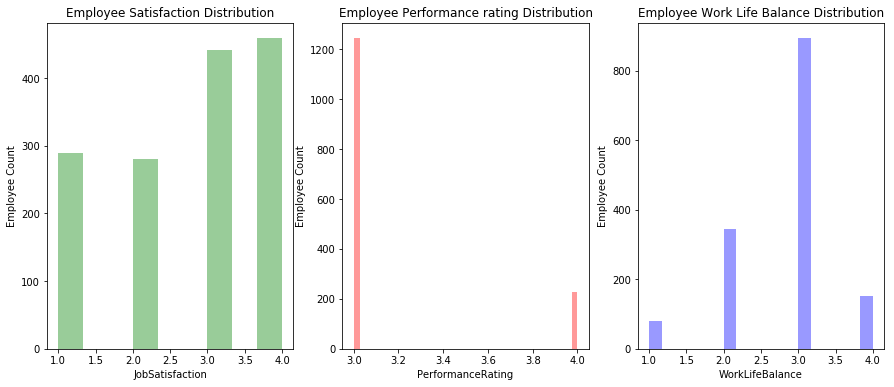

In [59]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots( ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(train_df.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Performance Rating
sns.distplot(train_df.PerformanceRating, kde=False, color="r", ax=axes[1]).set_title('Employee Performance rating Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Work Life Balance
sns.distplot(train_df.WorkLifeBalance, kde=False, color="b", ax=axes[2]).set_title('Employee Work Life Balance Distribution')
axes[2].set_ylabel('Employee Count')



#### By the above distribution plots, we can see that Job satisfaction is quite high for a lot of the employees, while there are a good number of them that have low satisfaction levels. We can investigate further to see the impact of Job Satisfaction on turnover. Also, work-life balance is fairly good based on our dataset. 

**Binarize Gender and OverTime**

In [173]:
df['Male'] = df.Gender == 'Male'

In [174]:
df.drop('Gender', axis = 1, inplace = True)

In [175]:
df['OverTime'] = df.OverTime == 'Yes'

<a id='eda2'></a>
# EDA 2.
## Count Plot


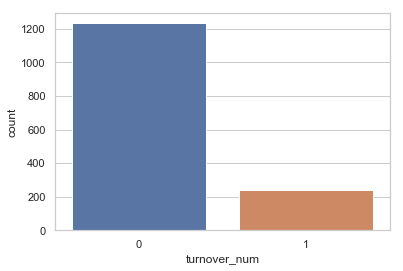

In [176]:
#countplot
sns.countplot(x = 'turnover_num', data = df)

**This figure shows the distribution of employee turnover. In this dataset, 237 employees left the company while 1233 stay. The data is highly imbalanced.**

<a id='eda3'></a>
# EDA 3.
## Gender

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


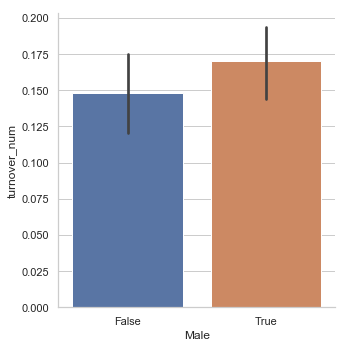

In [178]:
#factorplot
sns.factorplot(x = 'Male', y = 'turnover_num', kind = 'bar', data = df)

**Males are generally more likely to quit than females.**

<a id='eda4'></a>
# EDA 4.
## Marital Status

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


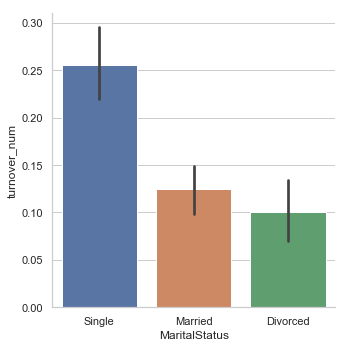

In [179]:
#factor plot
sns.factorplot(x = 'MaritalStatus', y = 'turnover_num', kind = 'bar', data = df)

**People who are single are more likely to quit in comparison to married and divorced employees.**

<a id='eda5'></a>
# EDA 5.
## Departments

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


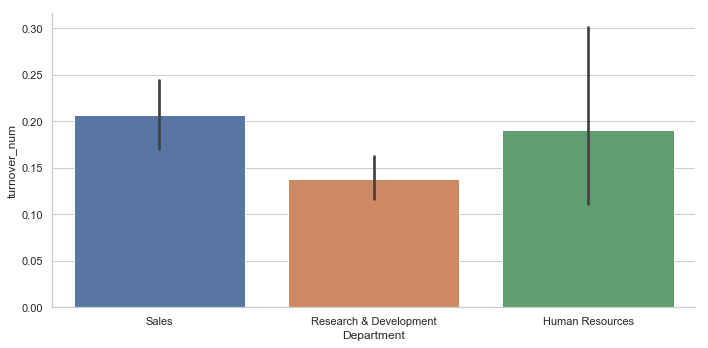

In [181]:
#factorplot
sns.factorplot(x = 'Department', y = 'turnover_num', kind ='bar', data = df, aspect = 2)

**Sales department and Human resources department are displaying higher turnover rate compared to research and development department.**

<a id='eda6'></a>
# EDA 6.
## Age

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


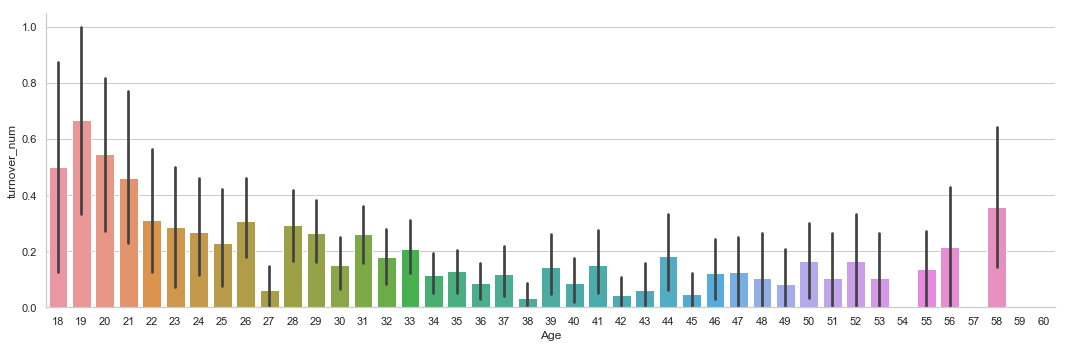

In [182]:
#factorplot
sns.factorplot(x = 'Age', y = 'turnover_num', data = df, kind = 'bar', aspect = 3)

**Younger employees have higher turnover rate compared to older people.**

<a id='eda7'></a>
# EDA 7.
## Job Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

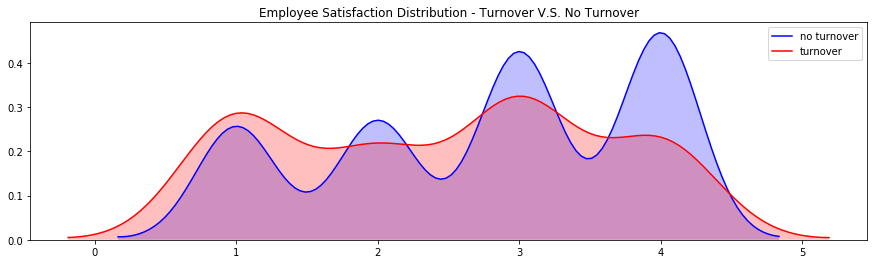

In [68]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_df.loc[(train_df['turnover_num'] == 0),'JobSatisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train_df.loc[(train_df['turnover_num'] == 1),'JobSatisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

**However, the density plots for turnover and no turnover with respect to the JobSatisfaction levels have overlaps, we can see that a lot of people who stayed had high satisfaction levels.**

<a id='eda8'></a>
# EDA 8. Employee Years At Company 

Summary: 
- Majority of the employees who left the company had **1 and 2** years at the company
- There is an decrease in employee turnover as years at the company increases

[Text(0, 0.5, 'Percent')]

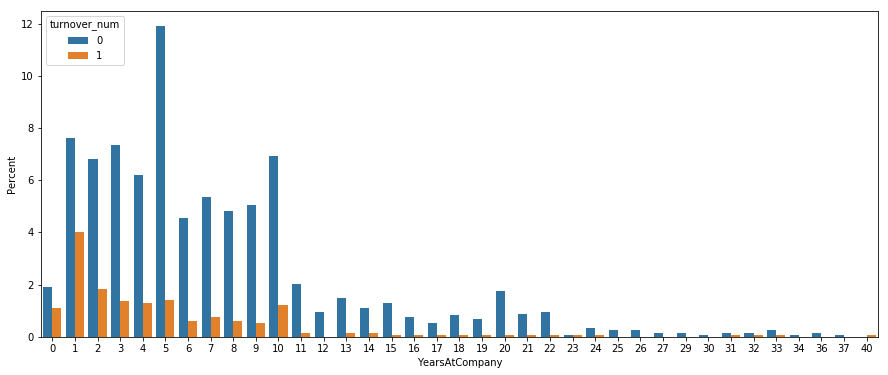

In [70]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="turnover_num", data=train_df, estimator=lambda x: len(x) / len(train_df) * 100)
ax.set(ylabel="Percent")

<a id='eda9'></a>
# EDA 9. Employee Department Distribution

In [71]:
hrleft = train_df[train_df['turnover_num']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(train_df.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'Department' })
hr_merge

,Department,left,stay
0,Research & Development,133,961
1,Sales,92,446
2,Human Resources,12,63


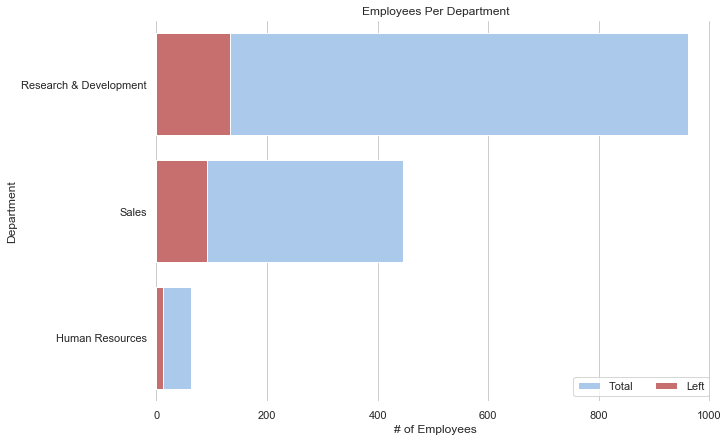

In [77]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total employees in departments that stayed
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Department', data=hr_merge,
            label="Total", color="b")

# Plot the total employees in departments that left
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

<a id='eda10'></a>
# EDA 10. Monthly Income

**Summary:** 

 - Employees who had less monthly income **(~4000 or less)** left the company more 
 - Employees who left generally were **not paid well**.


Text(0.5, 1.0, 'Employee Monthly Income Distribution - Turnover V.S. No Turnover')

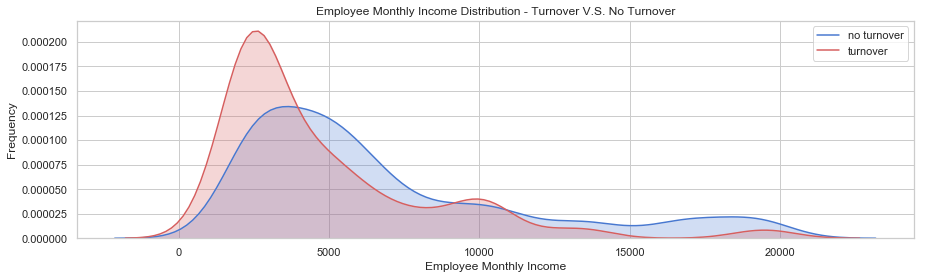

In [78]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 0),'MonthlyIncome'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 1),'MonthlyIncome'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Monthly Income', ylabel='Frequency')
plt.title('Employee Monthly Income Distribution - Turnover V.S. No Turnover')

<a id='eda11'></a>
# EDA 11. Job Level

**Summary:** 

 - Employees who were at entry level left the company more 

Text(0.5, 1.0, 'Employee Job Level Distribution - Turnover V.S. No Turnover')

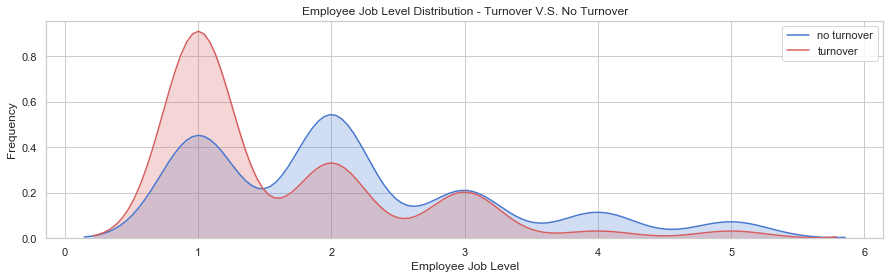

In [89]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 0),'JobLevel'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(train.loc[(train['turnover_num'] == 1),'JobLevel'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Job Level', ylabel='Frequency')
plt.title('Employee Job Level Distribution - Turnover V.S. No Turnover')

<a id='pre_processing'></a>
# Pre-processing 
***

- Apply **get_dummies()** to the categorical variables.
- Seperate categorical variables and numeric variables, then combine them.

In [185]:
df1 = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'EducationField', 
                                    'JobRole', 'MaritalStatus'])
                                    
df1.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,3,2,4,5993,8,True,...,0,0,0,0,0,1,0,0,0,1
1,49,8,1,3,2,2,2,5130,1,False,...,0,0,0,0,1,0,0,0,1,0
2,37,2,2,4,2,1,3,2090,6,True,...,1,0,0,0,0,0,0,0,0,1
3,33,3,4,4,3,1,3,2909,1,True,...,0,0,0,0,1,0,0,0,1,0
4,27,2,1,1,3,1,2,3468,9,False,...,1,0,0,0,0,0,0,0,1,0


**Recall that we have some variables that are highly correlated with each other. We will remove those to make the model better**

In [186]:
df2 = df1.drop(['TotalWorkingYears', 'YearsAtCompany', 'PerformanceRating'], axis = 1)

In [ ]:
X = df2.drop('turnover_num', axis = 1)
Y = df2.turnover_num

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


clfs = [RandomForestClassifier(n_jobs=-1),
        LogisticRegression(n_jobs=-1),DecisionTreeClassifier(),GradientBoostingClassifier()]


In [197]:
nfolds = 10
kf = KFold(n_splits = nfolds, random_state=0, shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False) 0.7734181677116772
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 0.8384212659072279
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
        

<a id='class_imbalance'></a>
# Class Imbalance

### Employee Turnover Rate: 16%

In [100]:
df.turnover_num.value_counts(1)

0    0.838776
1    0.161224
Name: turnover_num, dtype: float64

In [198]:
df3 = df.copy()

In [199]:
#create dummies

df3.loc[df3['BusinessTravel'] == 'Non-Travel', 'b_travel'] = 0
df3.loc[df3['BusinessTravel'] == 'Travel_Rarely', 'b_travel'] = .5
df3.loc[df3['BusinessTravel'] == 'Travel_Frequently', 'b_travel'] = 1

In [200]:
#one-hot encoding 

df3 = pd.get_dummies(df3, columns=['MaritalStatus','EducationField', 'Department'])


In [203]:
df3 = pd.get_dummies(df3, columns = ['JobRole'])

In [201]:
df3 = df3.drop('BusinessTravel', axis = 1)

In [204]:
df3.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,2,2,3,2,4,5993,8,True,...,1,0,0,0,0,0,0,0,1,0
1,49,8,1,3,2,2,2,5130,1,False,...,0,0,0,0,0,0,0,1,0,0
2,37,2,2,4,2,1,3,2090,6,True,...,0,0,0,1,0,0,0,0,0,0
3,33,3,4,4,3,1,3,2909,1,True,...,0,0,0,0,0,0,0,1,0,0
4,27,2,1,1,3,1,2,3468,9,False,...,0,0,0,1,0,0,0,0,0,0


In [206]:
df3.dtypes

Age                                    int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
NumCompaniesWorked                     int64
OverTime                                bool
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
turnover_num                           int64
Male      

In [207]:
df3['Male'] = df3['Male'].astype('int')
df3['OverTime'] = df3['OverTime'].astype('int')

In [208]:
df3.dtypes

Age                                    int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
NumCompaniesWorked                     int64
OverTime                               int32
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
turnover_num                           int64
Male      

<a id='train_test_split'></a>
# Split Train/Test Set
***

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

#Split the data and assign 'turnover_num' to 'turnover_df' and the rest of the features to 'feat_df'. 
feat_df = df3[df3.loc[ :, df3.columns != 'turnover_num'].columns]
turnover_df = df3['turnover_num']

feat_train, feat_test, turnover_train, turnover_test = train_test_split(feat_df, turnover_df, test_size = 0.2, random_state = 1, stratify = turnover_df)

In [210]:
feat_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,2,2,3,2,4,5993,8,1,...,1,0,0,0,0,0,0,0,1,0
1,49,8,1,3,2,2,2,5130,1,0,...,0,0,0,0,0,0,0,1,0,0
2,37,2,2,4,2,1,3,2090,6,1,...,0,0,0,1,0,0,0,0,0,0
3,33,3,4,4,3,1,3,2909,1,1,...,0,0,0,0,0,0,0,1,0,0
4,27,2,1,1,3,1,2,3468,9,0,...,0,0,0,1,0,0,0,0,0,0


In [211]:
turnover_df.head()

0    1
1    0
2    1
3    0
4    0
Name: turnover_num, dtype: int64

<a id='resample'></a>
# Resample - Smote


In [114]:
!pip install imblearn

In [117]:
!pip3 install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8f/42/155696f85f344c066e17af287359c9786b436b1bf86029bb3411283274f3/joblib-0.14.0-py2.py3-none-any.whl


You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from imblearn.over_sampling import SMOTE 

In [212]:
# Upsample using SMOTE
sm = SMOTE(random_state=1, ratio = 1.0)
feat_train_sm, turnover_train_sm = sm.fit_sample(feat_train, turnover_train)


print("Original shape:", feat_train.shape, turnover_train.shape)
print ("SMOTE sample shape:", feat_train_sm.shape, turnover_train_sm.shape)


Original shape: (1176, 44) (1176,)
SMOTE sample shape: (1972, 44) (1972,)


# Train Three Models
***

1. Logistic Regression
2. Random Forest
3. Gradient Boosting

<a id='lr'></a>
# Test Logistic Regression Performance


In [221]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(feat_train_sm, turnover_train_sm)

print ("\n\n ---Logistic Regression Model---")


lr2 = lr.fit(feat_train_sm, turnover_train_sm)
print(classification_report(turnover_test, lr.predict(feat_test)))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       247
           1       0.35      0.81      0.49        47

    accuracy                           0.73       294
   macro avg       0.65      0.76      0.65       294
weighted avg       0.86      0.73      0.77       294



C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [229]:
lr_result = cross_val_score(lr, feat_train_sm, turnover_train_sm, cv = 5, scoring = 'roc_auc')
lr_result.mean()

C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8658792221909024

In [230]:
lr_result1 = cross_val_score(lr, feat_test, turnover_test, cv = 5, scoring = 'roc_auc')
lr_result1.mean()

C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8042893424036281

### Logistic Regression roc_auc score (0.804)

<a id='rf'></a>
# Random Forest Classifier 
***

Notice how the random forest classifier takes a while to run on the dataset. That is one downside to the algorithm, it takes a lot of computation. But it has a better performance than the sipler models like Logistic Regression

### Apply 5-Fold Cross Validation for Random Forest

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Model
rf = RandomForestClassifier()

#n_estimators
n_estimators = [200,500,1000,1500,2000]

#max_depth
max_depth = [3,4,5]

#parameters
params = {'n_estimators': n_estimators, 'max_depth': max_depth}

rs_rf = RandomizedSearchCV(rf, params, scoring = 'neg_mean_squared_error', cv = 4, n_jobs = -1)

rs_rf.fit(feat_train_sm, turnover_train_sm)

rs_rf.best_params_



C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 2000, 'max_depth': 5}

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


rf1= RandomForestClassifier(n_estimators = 2000, max_depth = 5)

rf1 = rf1.fit(feat_train_sm, turnover_train_sm)

print ("\n\n ---Random Forest Model---")

print(classification_report(turnover_test, rf1.predict(feat_test)))



 ---Random Forest Model---
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       247
           1       0.55      0.45      0.49        47

    accuracy                           0.85       294
   macro avg       0.73      0.69      0.70       294
weighted avg       0.84      0.85      0.85       294



In [247]:
rf1_result = cross_val_score(rf, feat_train_sm, turnover_train_sm, cv=5, scoring='roc_auc')

rf_result.mean()

C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.9736294826110958

In [246]:
rf1_result1 = cross_val_score(rf, feat_test, turnover_test, cv = 5, scoring = 'roc_auc')
rf_result1.mean()

C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.718990022675737

### Random Forest F1 Score (0.72)

<a id='svc'></a>
# Gradient Boosting Classifier


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [233]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Model
gbc0 = GradientBoostingClassifier()

#n_estimators
n_estimators = [200,500,1000,1500,2000]

#max_depth
max_depth = [3,4,5]

#learning_rate
learning_rate = [0.1,0.25,0.4,0.5,1]

#parameters
params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

rs_gbc = RandomizedSearchCV(gbc0, params, scoring = 'neg_mean_squared_error', cv = 4, n_jobs = -1)

rs_gbc.fit(feat_train_sm, turnover_train_sm)

rs_gbc.best_params_

C:\Users\chhav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.25}

In [234]:
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(feat_train_sm,turnover_train_sm)

gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [235]:
gbc1 = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.25, max_depth = 5)  

gbc1 = gbc1.fit(feat_train_sm,turnover_train_sm)

gbc1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Apply 5-Fold Cross Validation for Gradient Boosting Classifier

In [240]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")

print(classification_report(turnover_test, gbc1.predict(feat_test)))



 ---Gradient Boosting Model---
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.67      0.47      0.55        47

    accuracy                           0.88       294
   macro avg       0.79      0.71      0.74       294
weighted avg       0.87      0.88      0.87       294



In [239]:
gbc1_result = cross_val_score(gbc1, feat_train_sm, turnover_train_sm, cv=5, scoring='roc_auc')
gbc1_result.mean()

0.9782614875781721

In [241]:
gbc1_result1 = cross_val_score(gbc1, feat_test, turnover_test, cv=5, scoring='roc_auc')
gbc1_result1.mean()

0.8010666666666667

### Gradient Boosting Classifier roc_auc Score (0.801)

<a id='roc'></a>
# ROC Graph

In [250]:
# Confusion Matrix for Linear Regresion
confusion_matrix(turnover_test, lr.predict(feat_test))

array([[177,  70],
       [  9,  38]], dtype=int64)

In [251]:
confusion_matrix(turnover_test, gbc1.predict(feat_test))

array([[236,  11],
       [ 25,  22]], dtype=int64)

In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(turnover_test, rf1.predict(feat_test))

array([[230,  17],
       [ 26,  21]], dtype=int64)

<a id='feature_importance'></a>
# Gradient Boosting Feature Importances

In [258]:
# Get Feature Importances
feature_importances = pd.DataFrame(gbc1.feature_importances_,
                                   index = feat_test.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,OverTime,2.572197e-01
1,MaritalStatus_Single,1.019868e-01
2,StockOptionLevel,8.808412e-02
3,MonthlyIncome,7.918313e-02
4,JobInvolvement,6.005224e-02
5,EducationField_Life Sciences,3.551128e-02
6,JobSatisfaction,3.537248e-02
7,DistanceFromHome,2.986367e-02
8,b_travel,2.888614e-02
9,EnvironmentSatisfaction,2.584488e-02


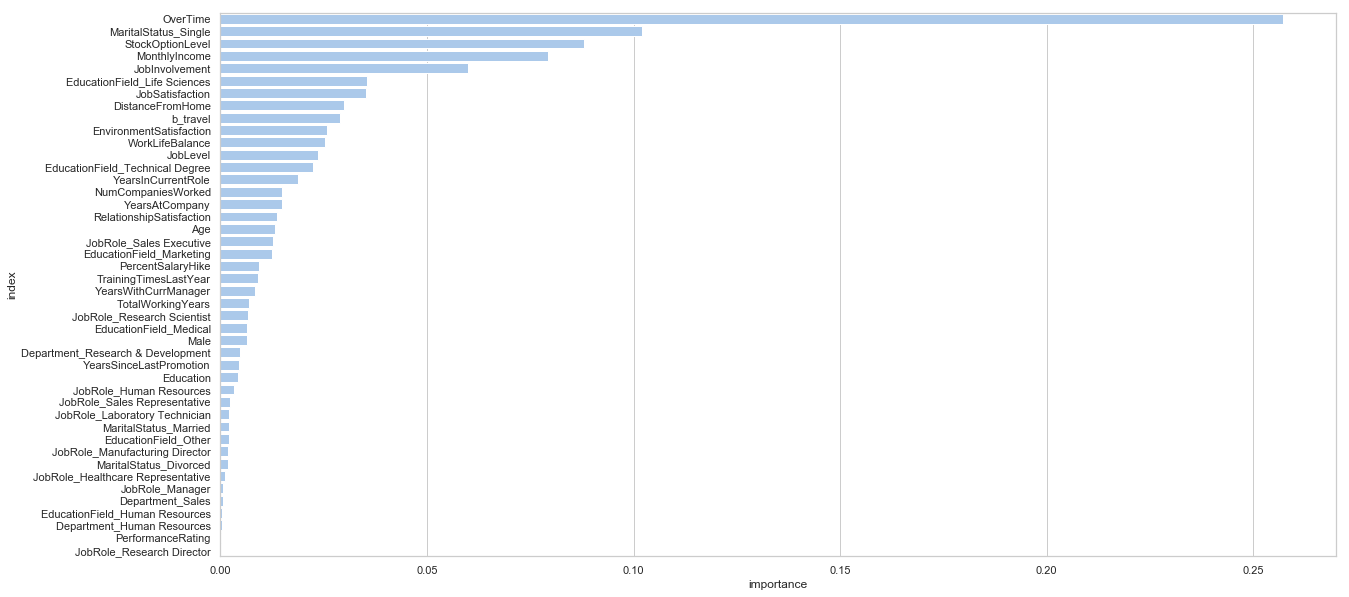

In [259]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

## Interesting Insights

### Insight 1: Human Resource Department has a high attrition rate even when their compensation and promotion are relative good compared to other non-managerial roles.

In [270]:
#Create a new data frame that contains each job role's monthly income and turnover rate, ordered by monthly income ascending.

role_income = df.groupby('JobRole', as_index=False)[['MonthlyIncome', 'turnover_num']].mean().sort_values(
    by=['MonthlyIncome'])
role_income

,JobRole,MonthlyIncome,turnover_num
8,Sales Representative,2626.000000,0.397590
2,Laboratory Technician,3237.169884,0.239382
6,Research Scientist,3239.972603,0.160959
1,Human Resources,4235.750000,0.230769
7,Sales Executive,6924.279141,0.174847
4,Manufacturing Director,7295.137931,0.068966
0,Healthcare Representative,7528.763359,0.068702
5,Research Director,16033.550000,0.025000
3,Manager,17181.676471,0.049020


C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`;

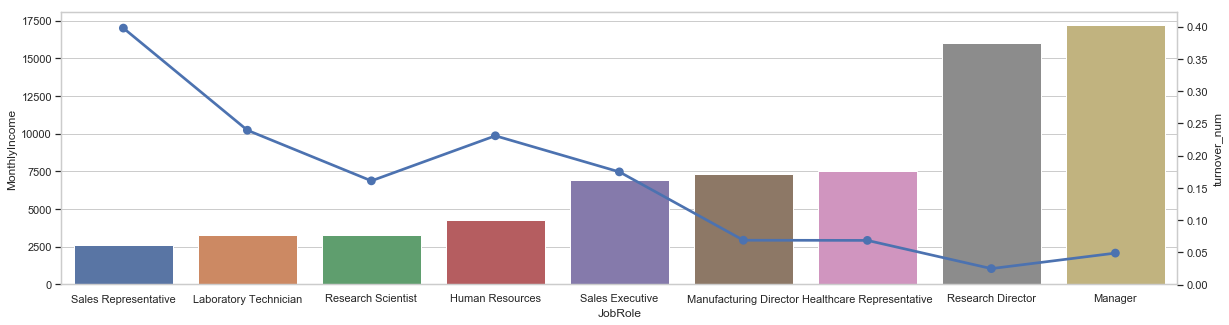

In [271]:
fig, ax = plt.subplots(figsize=(20,5))
sns.factorplot(x='JobRole', y='MonthlyIncome', data=role_income, aspect=4, size=4, kind='bar', ax=ax)
ax2 = ax.twinx()
sns.factorplot(x='JobRole', y='turnover_num', data=role_income, aspect=4, size=4, ax=ax2)
ax2.grid(None)
plt.close(2)
plt.close(3)

**The plot shows an overall trend that as monthly income increases, the attrition rate goes down. However, we see the exception for human resources. Compared to other non-managerial roles, human resource role is having higher monthly income but it's attrition rate is surprisingly higher than other roles. To investigate potential reasons, we look at years since last promotion and job satisfaction.**

In [272]:
df.groupby('JobRole', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,JobRole,YearsSinceLastPromotion
8,Sales Representative,1.060241
1,Human Resources,1.269231
2,Laboratory Technician,1.420849
6,Research Scientist,1.506849
4,Manufacturing Director,2.117241
7,Sales Executive,2.484663
0,Healthcare Representative,2.969466
5,Research Director,3.187500
3,Manager,4.833333


**Compared to other roles, human resouces generally gets promoted faster.**

In [273]:
df.groupby('JobRole', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,JobRole,JobSatisfaction
1,Human Resources,2.557692
4,Manufacturing Director,2.682759
2,Laboratory Technician,2.691120
5,Research Director,2.700000
3,Manager,2.705882
8,Sales Representative,2.734940
7,Sales Executive,2.754601
6,Research Scientist,2.773973
0,Healthcare Representative,2.786260


**This gives an understanding that Human resouces employees have slightly lower job satisfaction compared to other roles.**

### Insight 2: In terms of number of companies worked, people who worked in 2 - 4 companies are less likely to leave. Genderwise, female attrition rate is way less than male after working for 6 companies.

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


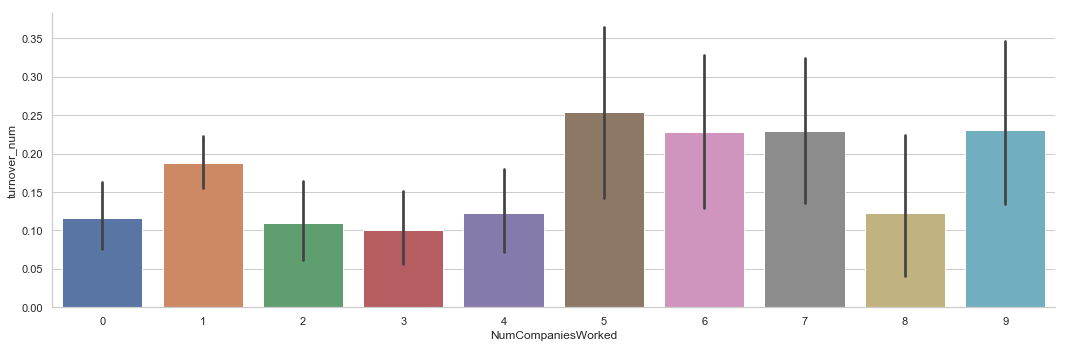

In [274]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'turnover_num', data=df, aspect= 3, kind = 'bar')

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


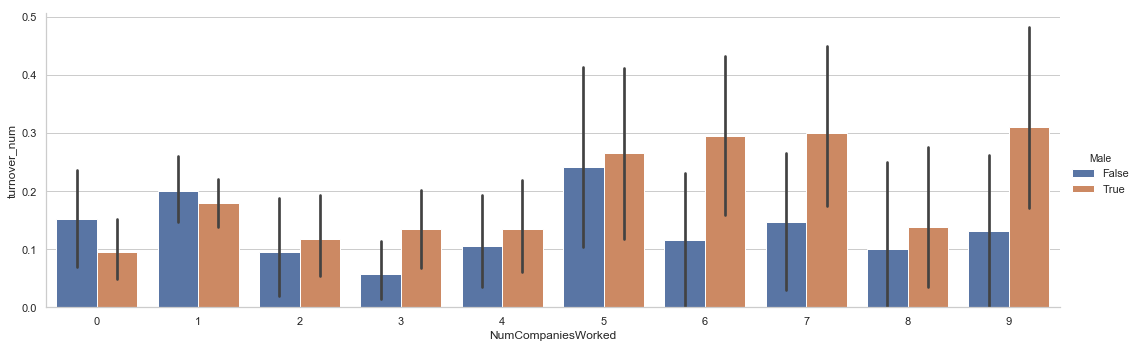

In [276]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'turnover_num', hue = 'Male', data=df, aspect= 3, kind = 'bar')

### Insight 3: Employees with doctorate degrees have the highest attrition rate at Job Level 3, compared to other job levels where the employees with Phds are almost always displaying lowest attrition rate.¶

C:\Users\chhav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


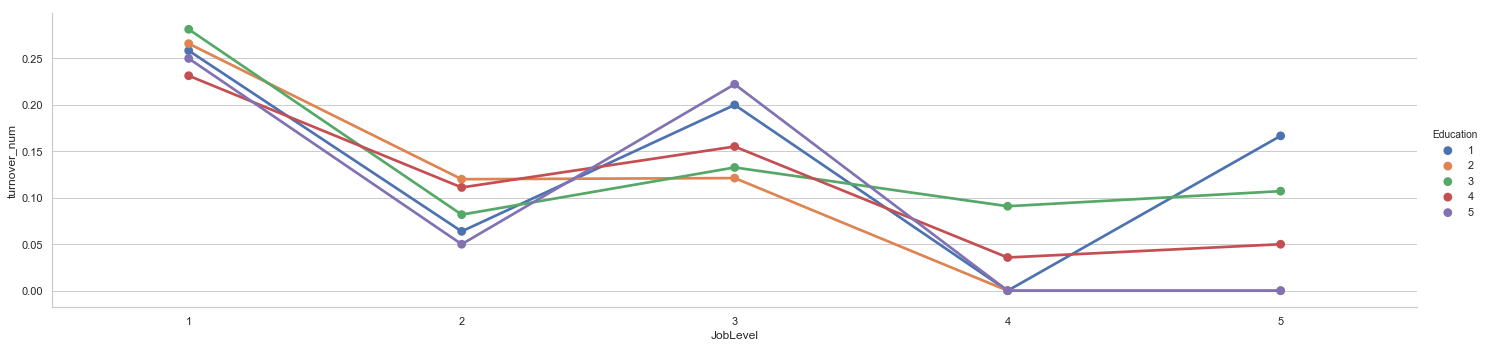

In [278]:
sns.factorplot(x = 'JobLevel', y = 'turnover_num', hue = 'Education', data=df, aspect= 4, ci=None)

In [279]:
df[df.JobLevel ==3].groupby('Education', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,Education,JobSatisfaction
4,5,2.333333
3,4,2.655172
2,3,2.663265
1,2,2.787879
0,1,2.800000


**On deep diving we can see that the employees with a Phd at Job Level 3 have low job satisfaction levels.**


In [281]:
df[df.JobLevel ==4].groupby('Education', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,Education,YearsSinceLastPromotion
3,4,3.821429
1,2,4.823529
2,3,4.863636
4,5,5.555556
0,1,7.500000


**We can also notice that employees with a Phd seem to take a long time to get promoted to level 4 in comparison to people who who have higher education, which could potentially lead to their turnover.**

# What to Optimize

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee. 

## Conclusion
**Binary Classification**: Turnover V.S. Non Turnover


**Need for Application**: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. 
We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

Consider employee turnover domain where an employee is given treatment by Human  Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth. 

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. 
Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly. 
 
 **Solution 1:** 
 - We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

**Solution 2:** 
Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:
 - Be a good coach
 - Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development    

# Insights
***

- The company should look deeper into human resources employees to understand what is leading them to have less satisfaction. Frequent communication and one-on-ones are strongly recommended.

- While the company doesn’t need to worry too much about people who worked for 2 – 4 companies, it’s still worth paying attention to the male employees who have changed more than 5 companies.

- Employees with Phd are not very satisfied with their jobs at level 3 and are having a longer time to be promoted from job level 3 to job level 4. It is recommended to go over the performance review system carefully to make sure that people are rewarded & recognized efficiently.